# Une introduction à Numpy

![](fig/python-logo.png)

- Tableaux Numpy
- Création de tableaux
- Opérations basiques
- Indexation et slicing
- Algèbre linéaire
- Méthodes sur les tableaux
- Broadcasting de tableaux

***

*Contenu sous licence [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0), largement inspiré de <https://github.com/pnavaro/python-notebooks> et <https://github.com/jakevdp/PythonDataScienceHandbook>*

## Numpy

Le Python pur est peu performant pour le calcul. Les listes ne sont pas des objets efficaces pour représenter les tableaux numériques de grande taille. [Numpy](http://www.numpy.org/) a été créé à l'initiative de développeurs qui souhaitaient combiner la souplesse du langage python et des outils de calcul algébrique performants.

Numpy se base sur :

- le `ndarray` : tableau multidimensionnel
- des objets dérivés comme les *masked arrays* et les matrices
- les `ufunc`s : opérations mathématiques optimisées pour les tableaux
- des méthodes pour réaliser des opération rapides sur les tableaux :
    - manipulation des *shapes*
    - tri
    - entrées/sorties
    - FFT
    - algébre linéaire
    - statistiques
    - calcul aléatoire
    - et bien plus !
  
Numpy permet de calculer *à la Matlab* en Python. Il est un élément de base de l'écosystème [SciPy](https://www.scipy.org/)

## Démarrer avec Numpy


In [2]:
import numpy as np
print(np.__version__)

1.24.3


Utilisez l'auto-complétion pour lister les objets numpy :

In [3]:
#np.nd<TAB>

SyntaxError: invalid syntax (3148124619.py, line 1)

La rubrique d'aide est également précieuse

In [3]:
np.ndarray?

## Tableaux Numpy

### Une question de performance

- Les listes Python sont trop lentes pour le calcul et utilisent beaucoup de mémoire
- Représenter des tableaux multidimensionnels avec des listes de listes devient vite brouillon à programmer

In [4]:
from random import random
from operator import truediv
import numpy as np

In [10]:
L1 = [random() for i in range(100000)]
L2 = [random() for i in range(100000)]
%timeit s = sum(map(truediv, L1, L2))

4.08 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
truediv(2,3)

0.6666666666666666

In [9]:
a1 = np.array(L1)
a2 = np.array(L2)
%timeit s = np.sum(a1/a2)

150 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### La différence avec les listes

Les différences entre tableaux Numpy et listes Python :
- un `ndarray` a une taille fixée à la création
- un `ndarray` est composé d'éléments du même type
- les opérations sur les tableaux sont réalisées par des routines C pré-compilées et optimisées (éventuellement parallèles)

In [11]:
a = np.array([0, 1, 2, 3])  # list
b = np.array((4, 5, 6, 7))  # tuple
c = np.matrix('8 9 0 1')    # string (syntaxe matlab)

In [12]:
print(a, b, c)

[0 1 2 3] [4 5 6 7] [[8 9 0 1]]


### Propriétés

In [13]:
a = np.array([1, 2, 3, 4, 5])  # On crée un tableau

In [14]:
type(a)  # On vérifie son type

numpy.ndarray

In [17]:
a.dtype  # On affiche le type de ses éléments

dtype('int32')

In [18]:
a.itemsize  # On affiche la taille mémoire (en octets) de chaque élément

4

In [19]:
a.shape  # On retourne un tuple indiquant la longueur de chaque dimension

(5,)

In [20]:
a.size  #  On retourne le nombre total d'éléments

5

In [21]:
a.ndim   # On retourne le nombre de dimensions

1

In [ ]:
a.nbytes  # On retourne l'occupation mémoire

> - Toujours utiliser `shape` ou `size` pour les tableaux numpy plutôt que `len`
> - `len` est réservé aux tableaux 1D

## Création de tableaux Numpy

### Avec des valeur constantes

In [22]:
x = np.zeros((5, 3))  # On ne précise pas le type : on crée des flottants
print(x)
print(x.dtype)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
float64


In [23]:
x = np.zeros((5, 3), dtype=int)  # On explicite le type
print(x)
print(x.dtype)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
int32


On dispose d'une panoplie de fonctions pour allouer des tableaux avec des valeurs constantes ou non initialisées (`empty`) :

`empty, empty_like, ones, ones_like, zeros, zeros_like, full, full_like`

### Création à partir d'une séquence


#### `arange`

C'est l'équivalent de `range` pour les listes.

In [24]:
np.arange(5)  # entiers de 0 à 4

array([0, 1, 2, 3, 4])

In [25]:
np.arange(5, dtype=np.double)  # flottants de 0. à 4.

array([0., 1., 2., 3., 4.])

In [27]:
np.arange(2, 7)  # entiers de 2 à 6.

array([2, 3, 4, 5, 6])

In [28]:
np.arange(2, 7, 0.5)  # flottants avec incrément de 0.5.

array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5])

#### `linspace` et `logspace`

In [29]:
# 5 éléments régulièrement espacés entre 1 et 4, 1 et 4 inclus
np.linspace(1, 4, 5)

array([1.  , 1.75, 2.5 , 3.25, 4.  ])

In [30]:
# 5 éléments régulièrement espacés selon une progression géométrique entre 10^1 et 10^4
np.logspace(1, 4, 5)

array([   10.        ,    56.23413252,   316.22776602,  1778.27941004,
       10000.        ])

Consulter l'aide contextuelle pour plus de fonctionnalités

In [4]:
np.logspace?

### Exercice : créer les tableaux suivants

```python
[100 101 102 103 104 105 106 107 108 109]
```
> Astuce : `np.arange()`

In [33]:
# Votre code ici
np.arange(100, 110)

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109])

In [35]:
# Solution
np.arange(100, 110)

array([-2.00000000e+00, -1.80000000e+00, -1.60000000e+00, -1.40000000e+00,
       -1.20000000e+00, -1.00000000e+00, -8.00000000e-01, -6.00000000e-01,
       -4.00000000e-01, -2.00000000e-01, -2.22044605e-16,  2.00000000e-01,
        4.00000000e-01,  6.00000000e-01,  8.00000000e-01,  1.00000000e+00,
        1.20000000e+00,  1.40000000e+00,  1.60000000e+00,  1.80000000e+00])

```python
[-2. -1.8 -1.6 -1.4 -1.2 -1. -0.8 -0.6 -0.4 -0.2 0. 
0.2 0.4 0.6 0.8 1. 1.2 1.4 1.6 1.8]
```

> Astuce : `np.linspace()`

In [ ]:
# Votre code ici

In [36]:
# Solution
np.linspace(-2., 2, num=20, endpoint=False)
np.logspace(-3,-2,10)

array([0.001     , 0.00129155, 0.0016681 , 0.00215443, 0.00278256,
       0.00359381, 0.00464159, 0.00599484, 0.00774264, 0.01      ])

```python
[ 0.001	0.00129155 0.0016681 0.00215443 0.00278256 
  0.00359381 0.00464159 0.00599484 0.00774264 0.01]
```

> Astuce : `np.logspace()`

In [ ]:
# Votre code ici

In [ ]:
# Solution
np.logspace(-3, -2, num=10)

```python
[[ 0. 0. -1. -1. -1.] 
 [ 0. 0.  0. -1. -1.] 
 [ 0. 0.  0.  0. -1.]
 [ 0. 0.  0.  0.  0.]
 [ 0. 0.  0.  0.  0.] 
 [ 0. 0.  0.  0.  0.] 
 [ 0. 0.  0.  0.  0.]]
```

> Astuce : `np.tri()`, `np.ones()`

In [42]:
# Votre code ici
np.tri(4,3)

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [1]:
# Solution
np.tri(7, 5, k=1) - np.ones((7, 5))

NameError: name 'np' is not defined

### Création de tableaux à partir de fichiers

Afin d'illustrer la création d'un tableau numpy à partir de données lues dans un fichier texte, on commence par sauvegarder un tableau dans un fichier.

In [5]:
x = np.arange(0.0, 5.0, 1.0)
y = x*10.
z = x*100.

In [6]:
np.savetxt('test.out', (x, y, z))
%pycat test.out

In [46]:
np.savetxt('test.out', (x, y, z), fmt='%1.4e')   # Notation exponentielle
%pycat test.out

In [47]:
np.loadtxt('test.out')

array([[  0.,   1.,   2.,   3.,   4.],
       [  0.,  10.,  20.,  30.,  40.],
       [  0., 100., 200., 300., 400.]])

`savetxt` et `loadtxt` ont leurs correspondants binaires :

- [`save`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.save.html#numpy.save) : enregistrer un tableau dans un fichier binaire au format `.npy`
- [`load`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.load.html#numpy.load): créer un tableau numpy à partir d'un fichier binaire numpy

### Format HDF5 avec H5py

Le format `.npy` n'est lisible que par Numpy. 
À l'inverse, le format HDF5 est partagé par un grand nombre d'applications.
De plus, il permet de structurer des données binaires :
- en les nommants
- en ajoutant des métadonnées
- en assurant une portabilité indépendante de la plateforme

> voir le [manuel utilisateur](http://docs.h5py.org)

H5py est une interface Python pour HDF5.

On écrit dans le fichier `test.h5`

In [48]:
import h5py as h5

with h5.File('test.h5', 'w') as f:
    f['x'] = x
    f['y'] = y
    f['z'] = z

On lit le fichier `test.h5` (qui pourrait provenir d'une autre application)

In [49]:
with h5.File('test.h5', 'r') as f:
    for field in f.keys():
        print(f"{field}: {f[field][()]}")

x: [0. 1. 2. 3. 4.]
y: [ 0. 10. 20. 30. 40.]
z: [  0. 100. 200. 300. 400.]


## Opérations basiques sur les tableaux

Par défaut, Numpy réalise les opérations arithmétiques éléments par éléments

In [50]:
a = np.array([0, 1, 2, 3])
b = np.array((4, 5, 6, 7))

print(a * b)  # Produit éléments par éléments : pas le produit matriciel !
print(a + b)

[ 0  5 12 21]
[ 4  6  8 10]


In [51]:
print(a**2)

[0 1 4 9]


In [52]:
print(5 * a)
print(5 + a)

[ 0  5 10 15]
[5 6 7 8]


In [53]:
print(a < 2)

[ True  True False False]


In [54]:
print(np.cos(a*np.pi))  # Utilisation de ufunc

[ 1. -1.  1. -1.]


De nombreuses ufunc dans la [doc officielle](https://docs.scipy.org/doc/numpy/user/quickstart.html#universal-functions).

##  Indexation et slicing

### Indexation

Les règles différent légèrement des listes pour les tableaux multi-dimensionnels

In [59]:
# Indexation d'un tableau numpy
a = np.arange(9).reshape(3, 3)  # Notez l'effet de la méthode reshape()
print(a)
print(a[1, 2])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
5


In [60]:
# Indexation de la liste équivalente
liste = a.tolist()
print(liste)
print(liste[1][2])

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]
5


### Slicing

Pour les tableaux unidimensionnels, les règles de slicing sont les mêmes que pour les séquences.
Pour les tableaux multidimensionnels numpy, le slicing permet d'extraire des séquences dans n'importe quelle direction.

In [61]:
print(a)
print(a[2, :])  # Retourne la 3ème ligne
print(a[:, 1])  # Retourne la deuxième colonne

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[6 7 8]
[1 4 7]


**Attention :** contrairement aux listes, le slicing de tableaux ne renvoie pas une copie mais constitue une ***vue*** du tableau.

In [62]:
b = a[:, 1]
b[0] = -1
print(a)

[[ 0 -1  2]
 [ 3  4  5]
 [ 6  7  8]]


`a` est aussi une vue du tableau `np.arange(9)` obtenue avec la méthode `reshape()` donc `a` et `b` sont deux vues différentes du même tableau :

In [63]:
b.base is a.base  # b.base retourne le tableau dont b est la vue

True

Si on veut réaliser une copie d'un tableau, il faut utiliser la fonction `copy()`

In [64]:
b = a[:, 1].copy()

ici `b` n'est pas une vue mais une copie donc `b.base` vaut `None` et `a` n'est pas modifié.

In [65]:
print(b.base)
b[0] = 200
print(a)

None
[[ 0 -1  2]
 [ 3  4  5]
 [ 6  7  8]]


### Exercice

Approcher la dérivée de $f(x) = \sin(x)$ par la méthode des différences finies centrées :

$$\frac{\partial f}{\partial x} \approx \frac{f \left(x + \frac{\Delta x}{2}\right)-f \left(x - \frac{\Delta x}{2} \right)}{\Delta x}$$

Les valeurs seront calculées au milieu de deux abscisses discrètes successives.

In [66]:
# On crée un tableau de 40 points d'abscisse
x, dx = np.linspace(0., 4.*np.pi, 40, retstep=True)
y = np.sin(x)

NameError: name 'x_mil' is not defined

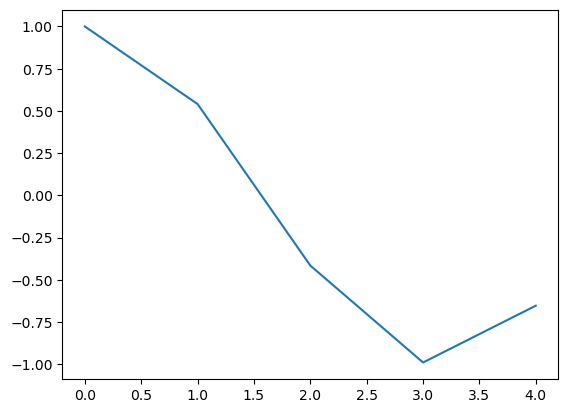

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, np.cos(x));  # la dérivée analytique de sin() est cos()
# Votre code ici
# Décommentez la dernière ligne pour tracer la dérivée numérique dy_dx
# en fonction du milieu de 2 abscisses x_mil
plt.plot(x_mil, dy_dx, 'rx');

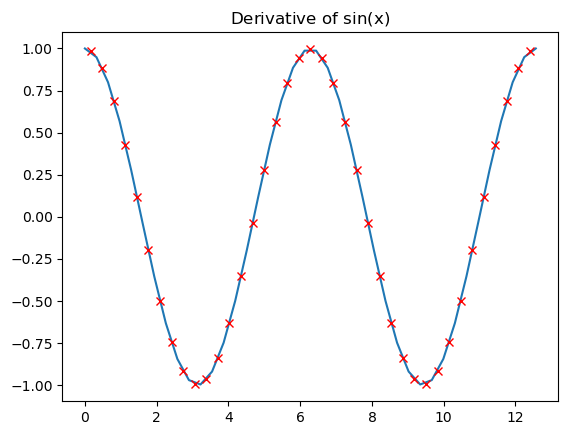

In [69]:
# Solution
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, np.cos(x))  # la dérivée analytique de sin() est cos()

x_mil = 0.5*(x[1:] + x[:-1])
dy = y[1:] - y[:-1]
dy_dx = dy/dx
plt.plot(x_mil, dy_dx, 'rx')  # x_mil est le milieu de deux abscisses
plt.title(r"$\rm{Derivative\ of}\ \sin(x)$");

## Quelques opérations d'algèbre linéaire

In [8]:
A = np.array([[1, 1],
              [0, 1]])
B = np.array([[2, 0],
              [3, 4]])

In [72]:
# Produit élément par élément
print(A*B)

[[2 0]
 [0 4]]


In [9]:
# Produit matriciel (3 syntaxes équivalentes)
print(A.dot(B))      
print(np.dot(A, B))
print(A@B)

[[5 4]
 [3 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


In [75]:
a = np.array([[1., 2.],
              [3., 4.]])
print(a)

[[1. 2.]
 [3. 4.]]


In [10]:
# Deux syntaxes équivalentes pour la transposition
print(a.transpose())
print(a.T)

NameError: name 'a' is not defined

In [12]:
print(np.linalg.inv(a))  # inversion de matrice

NameError: name 'a' is not defined

In [78]:
print(np.trace(a))  # trace

5.0


In [79]:
print(np.eye(2))     # "eye" représente "I", la matrice identité

[[1. 0.]
 [0. 1.]]


In [80]:
y = np.array([[5.], [7.]])  # Résoudre A*x = y
x = np.linalg.solve(a, y)
print(x)
print(a@x == y)

[[-3.]
 [ 4.]]
[[ True]
 [ True]]


In [81]:
j = np.array([[0., -1.], [1., 0.]])
print(np.dot(j, j))     # produit matriciel
print(np.linalg.eig(j))  # Extraction des valeurs propres

[[-1.  0.]
 [ 0. -1.]]
(array([0.+1.j, 0.-1.j]), array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        -0.70710678j, 0.        +0.70710678j]]))


## Les méthodes associées aux tableaux

Elles sont très nombreuses : impossible de toutes les lister dans le cadre de ce cours.
Citons brièvement :

- `min`, `max`, `sum`
- `sort`, `argmin`, `argmax`
- statistiques basiques : `cov`, `mean`, `std`, `var`

À chercher dans la [doc officielle](https://docs.scipy.org/doc/numpy/user/quickstart.html#).

## Broadcasting de tableaux

Le *broadcasting* est un mécanisme qui permet de faire des opérations sur des tableaux de différentes taille ou *shape*. 


Pour rappel, les opérations sur les tableaux de même taille sont réalisées élément par élément :

In [82]:
a = np.array([0, 1, 2])
b = np.array([1, 1, 1])
a + b

array([1, 2, 3])

Si on remplace `b` par le scalaire `1`, numpy déclenche le mécanisme de broadcasting où ce scalaire est virtuellement transformé en tableau de même taille que `a` en répétant la valeur, ce qui aboutit au même résultat :

In [83]:
a + 1

array([1, 2, 3])

Si on additionne maintenant un tableau 1D et un tableau 2D :

In [84]:
A = np.ones((3, 3), dtype=int)
A

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [85]:
a

array([0, 1, 2])

In [86]:
A + a

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

`a` est étendu suivant la 2e dimension jusqu'à couvrir la *shape* de `A`.

Considérons maintenant un tableau ligne et un tableau colonne :

In [87]:
a = np.arange(3)
a

array([0, 1, 2])

In [88]:
b = np.arange(3).reshape(3, 1)
b

array([[0],
       [1],
       [2]])

In [89]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

`a` et `b` sont étendus simultanément pour couvrir la *shape* `(3, 3)`.

### Règles de broadcasting

1. Si les deux tableaux n'ont pas la même dimension, la *shape* de celui avec la plus faible dimension est complétée avec des $1$ sur son bord gauche.
2. Si les *shapes* des tableaux n'ont aucune valeur commune, le tableau dont la shape vaut $1$ est étendue jusqu'à la valeur de l'autre tableau.
3. Si les tailles sont différentes et non-unitaires dans toutes les dimensions, alors le broadcasting est impossible et on lève une erreur.

### Exemple 1 : on étend un tableau

In [90]:
A = np.ones((2, 3), dtype=int)
a = np.arange(3)
print(f"{A.shape = }")
print(f"{a.shape = }")

A.shape = (2, 3)
a.shape = (3,)


- Selon la règle 1., la *shape* de `a` devient `(1, 3)`.
- Selon la règle 2., la première dimension de `a` est étendue à `(2, 3)`.

Maintenant que les *shapes* correspondent, l'addition terme à terme est possible :

In [91]:
A + a

array([[1, 2, 3],
       [1, 2, 3]])

### Exemple 2  : on étend les deux tableaux

In [92]:
a = np.arange(3).reshape((3, 1))
print(a)
print(f"{a.shape = }")

[[0]
 [1]
 [2]]
a.shape = (3, 1)


In [93]:
b = np.arange(3)
print(b)
print(f"{b.shape = }")

[0 1 2]
b.shape = (3,)


Dans ce cas, les deux tableaux doivent être étendus.

- Selon la règle 1., la *shape* de `b` doit être étendue en `(1, 3)`.
- Selon la règle 2., on étend la *shape* de `a` et `b` en prenant le maximum de la taille dans chaque dimension soit `(3, 3)`.

In [ ]:
a + b

### Exemple 3 :  broadcasting impossible

In [94]:
a = np.ones((3, 2), dtype=int)
print(a)
print(f"{a.shape = }")

[[1 1]
 [1 1]
 [1 1]]
a.shape = (3, 2)


In [95]:
b = np.arange(3)
print(b)
print(f"{b.shape = }")

[0 1 2]
b.shape = (3,)


- Selon la règle 1., la *shape* de `b` devient `(1, 3)`.
- Selon la règle 2., la *shape* de `b` devient `(3, 3)`.
- Selon la règle 3., le broadcasting est alors impossible :

In [ ]:
a + b

### Exemple d'utilisation

Un cas classique d'utilisation du broadcasting consiste à retirer la moyenne dans certaines dimensions :

In [96]:
rng = np.random.default_rng(seed=0)
X = rng.random((6, 3))
X

array([[0.63696169, 0.26978671, 0.04097352],
       [0.01652764, 0.81327024, 0.91275558],
       [0.60663578, 0.72949656, 0.54362499],
       [0.93507242, 0.81585355, 0.0027385 ],
       [0.85740428, 0.03358558, 0.72965545],
       [0.17565562, 0.86317892, 0.54146122]])

On calcule la moyenne selon la première dimension :

In [97]:
Xmean = X.mean(0)
Xmean

array([0.5380429 , 0.58752859, 0.46186821])

On peut maintenant calculer la valeur centrée de `X` en retirant la moyenne :

In [98]:
X_centered = X - Xmean
X_centered   

array([[ 0.09891878, -0.31774188, -0.42089469],
       [-0.52151527,  0.22574164,  0.45088737],
       [ 0.06859287,  0.14196797,  0.08175678],
       [ 0.39702952,  0.22832496, -0.45912971],
       [ 0.31936137, -0.55394302,  0.26778724],
       [-0.36238728,  0.27565033,  0.07959301]])

On vérifie que `X_centered` est à moyenne nulle suivant la première dimension :

In [99]:
X_centered.mean(0)

array([ 5.55111512e-17,  0.00000000e+00, -5.55111512e-17])

## Programmation avec Numpy

- Les opérations sur les tableaux sont rapides, les boucles python sont lentes => **Éviter les boucles !**
- C'est une gymnastique qui nécessite de l'entraînement
- Le résultat peut devenir difficile à lire et à débugguer, par exemple dans le cas de boucles contenant de multiples conditions
- D'autres options sont alors envisageables (Cython, Pythran, Numba, etc.)

## Références

- [NumPy reference](http://docs.scipy.org/doc/numpy/reference/)
- [Numpy by Konrad Hinsen](http://calcul.math.cnrs.fr/Documents/Ecoles/2013/python/NumPy%20avance.pdf)
- [Cours de Pierre Navaro](https://github.com/pnavaro/python-notebooks)
- [Python Datascience Handbook](https://github.com/jakevdp/PythonDataScienceHandbook), par Jake VanderPlas
- [Scipy Lecture notes](http://www.scipy-lectures.org/)